In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [356]:
df = pd.read_csv('/Users/Dennis/Downloads/data500_utf8.csv')
columns = ['date' , 'customerId' , 'ProdID','product','unit','qty','price','gross','total1','total2','group']
df.columns = columns
df.drop(['total1','total2'],axis = 1,inplace = True)
df.head(15)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,customerId,ProdID,product,unit,qty,price,gross,group
0,2018/01/02,125600,4.710105e+12,T30光泉全鮮,個,1,27.00,27.00,471
1,2018/01/02,125752,4.710126e+12,義美傳統低糖豆奶1000,個,1,37.00,37.00,471
2,2018/01/02,125752,4.713780e+12,利聯四層黑潮吊式口罩7入,個,1,39.00,39.00,471
3,NaN,NaN,4.716727e+12,男用手帕,個,1,17.00,17.00,471
4,2018/01/02,125752,6.000000e+12,天爸水果,個,70,1.00,70.00,600
5,NaN,NaN,4.710421e+12,每朝綠茶,個,1,28.00,28.00,471
6,2018/01/02,406968,4.713327e+12,土雞兒機能土雞蛋10入,個,2,78.00,156.00,471
7,NaN,NaN,4.710265e+12,契栽芋香米,個,1,259.00,259.00,471
8,2018/01/02,125752,4.710364e+12,新奇漂白水1500c,個,1,48.00,48.00,471
9,NaN,NaN,4.710186e+12,泡舒洗潔精補充包,個,1,60.00,60.00,471


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100257 entries, 0 to 100256
Data columns (total 9 columns):
date          36580 non-null object
customerId    36580 non-null object
ProdID        99670 non-null float64
product       100256 non-null object
unit          99670 non-null object
qty           99670 non-null object
price         99668 non-null object
gross         100255 non-null object
group         100257 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [358]:
df.qty = df.qty.str.replace(',','')
df.price = df.price.str.replace(',','')
df.gross = df.gross.str.replace(',','')
df.qty = pd.to_numeric(df.qty)
df.price = pd.to_numeric(df.price)
df.gross = pd.to_numeric(df.gross)
df.price = df.gross/df.qty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100257 entries, 0 to 100256
Data columns (total 9 columns):
date          36580 non-null object
customerId    36580 non-null object
ProdID        99670 non-null float64
product       100256 non-null object
unit          99670 non-null object
qty           99670 non-null float64
price         99668 non-null float64
gross         100255 non-null float64
group         100257 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 6.9+ MB


In [359]:
nan_df =  df[df.isnull().values ==True]
nan_df.drop_duplicates().groupby(['product']).sum()
pvt = nan_df.drop_duplicates().groupby(['product']).sum()
print(pvt.head())
pvt.groupby(['group']).sum().head()

                  ProdID  qty  price  gross  group
product                                           
(依)抗菌茶香洗手乳  4.710736e+12  1.0   68.0   68.0    471
(依)抗菌蜜香洗手乳  4.710736e+12  1.0   68.0   68.0    471
(盛)南瓜子原味    9.420348e+12  3.0  120.0  180.0    942
(盛)南瓜子綠茶    9.420348e+12  3.0  120.0  180.0    942
(盛)夏威夷豆     4.710174e+12  1.0  135.0  135.0    471


,ProdID,qty,price,gross
group,,,,
0,0.000000e+00,0.0,0.0,-39591.0
107,1.074220e+10,1.0,89.0,89.0
171,1.710600e+09,1.0,925.0,925.0
200,1.200100e+13,6.0,2214.0,2214.0
212,8.480251e+10,4.0,170.0,170.0


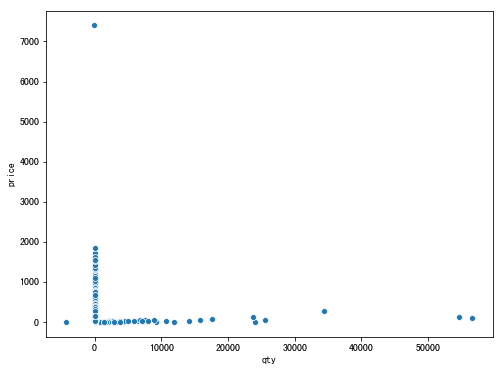

In [360]:
plt.figure(figsize  =(8,6))
sns.scatterplot(x =pvt.qty ,y= pvt.price)

# qty <= 0 ?   表示資料有我們不知道的異常，畫出來試試看！

# 價格 > 7000 ? 又是什麼妖怪？

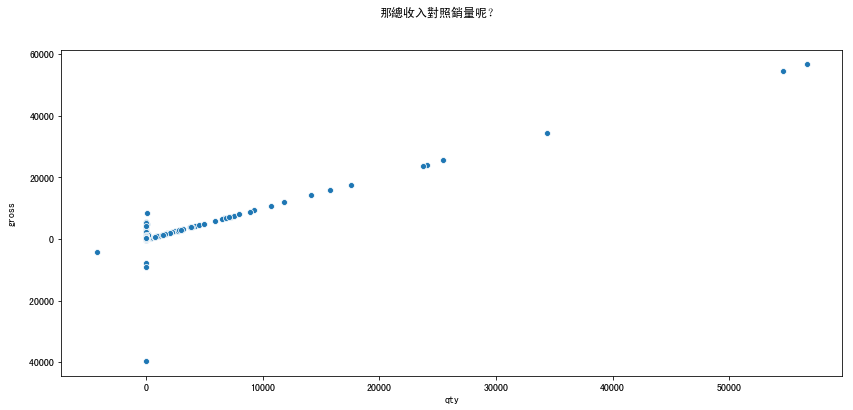

In [361]:
plt.figure(figsize  =(14,6))
plt.suptitle('那總收入對照銷量呢？')
sns.scatterplot(x =pvt.qty ,y= pvt.gross)

# 首先看看qty < 0 的商品
稍微看一下，發現有提貨券、回收冷氣卡、折扣、標籤費等等，也就是說我們推測小於0的qty代表：未收到現金的交易。
這樣有兩種情況：
1. 給出現金，好比購回冷氣卡、折扣、標籤費
2. 沒有收現金，好比使用提貨券、一般商品

In [362]:
df[df.gross<0]

,date,customerId,ProdID,product,unit,qty,price,gross,group
297,NaN,NaN,6.000000e+12,綠活坊有機蔬菜,個,-65.0,1.0,-65.0,600
431,NaN,NaN,4.987072e+12,小白兔貼式暖暖包,個,-1.0,149.0,-149.0,498
1210,NaN,NaN,6.000000e+12,提貨券,個,-1.0,600.0,-600.0,600
1219,NaN,NaN,4.710362e+12,娃娃酥,個,-2.0,85.0,-170.0,471
1273,NaN,NaN,7.614200e+12,瑞士果醬(森林莓),個,-1.0,120.0,-120.0,761
1297,NaN,NaN,4.710736e+12,依必朗抗菌洗潔精,個,-1.0,99.0,-99.0,471
1348,NaN,NaN,6.000000e+12,提貨券,個,-1.0,300.0,-300.0,600
1354,NaN,NaN,4.712765e+12,62A男長袖厚棉衫M,個,-2.0,239.0,-478.0,471
1597,NaN,NaN,8.007150e+12,奧利塔精緻葡萄籽油1L,個,-1.0,299.0,-299.0,800
1599,NaN,NaN,4.711589e+12,紅標料理米酒0.6公升,個,-1.0,27.0,-27.0,471


有趣的是，某些商品的銷量非常好，佔了合作社銷量的一大部分。 我們把銷量大於6000左右的商品畫出來看看

Text(0, 0.5, '總銷量')

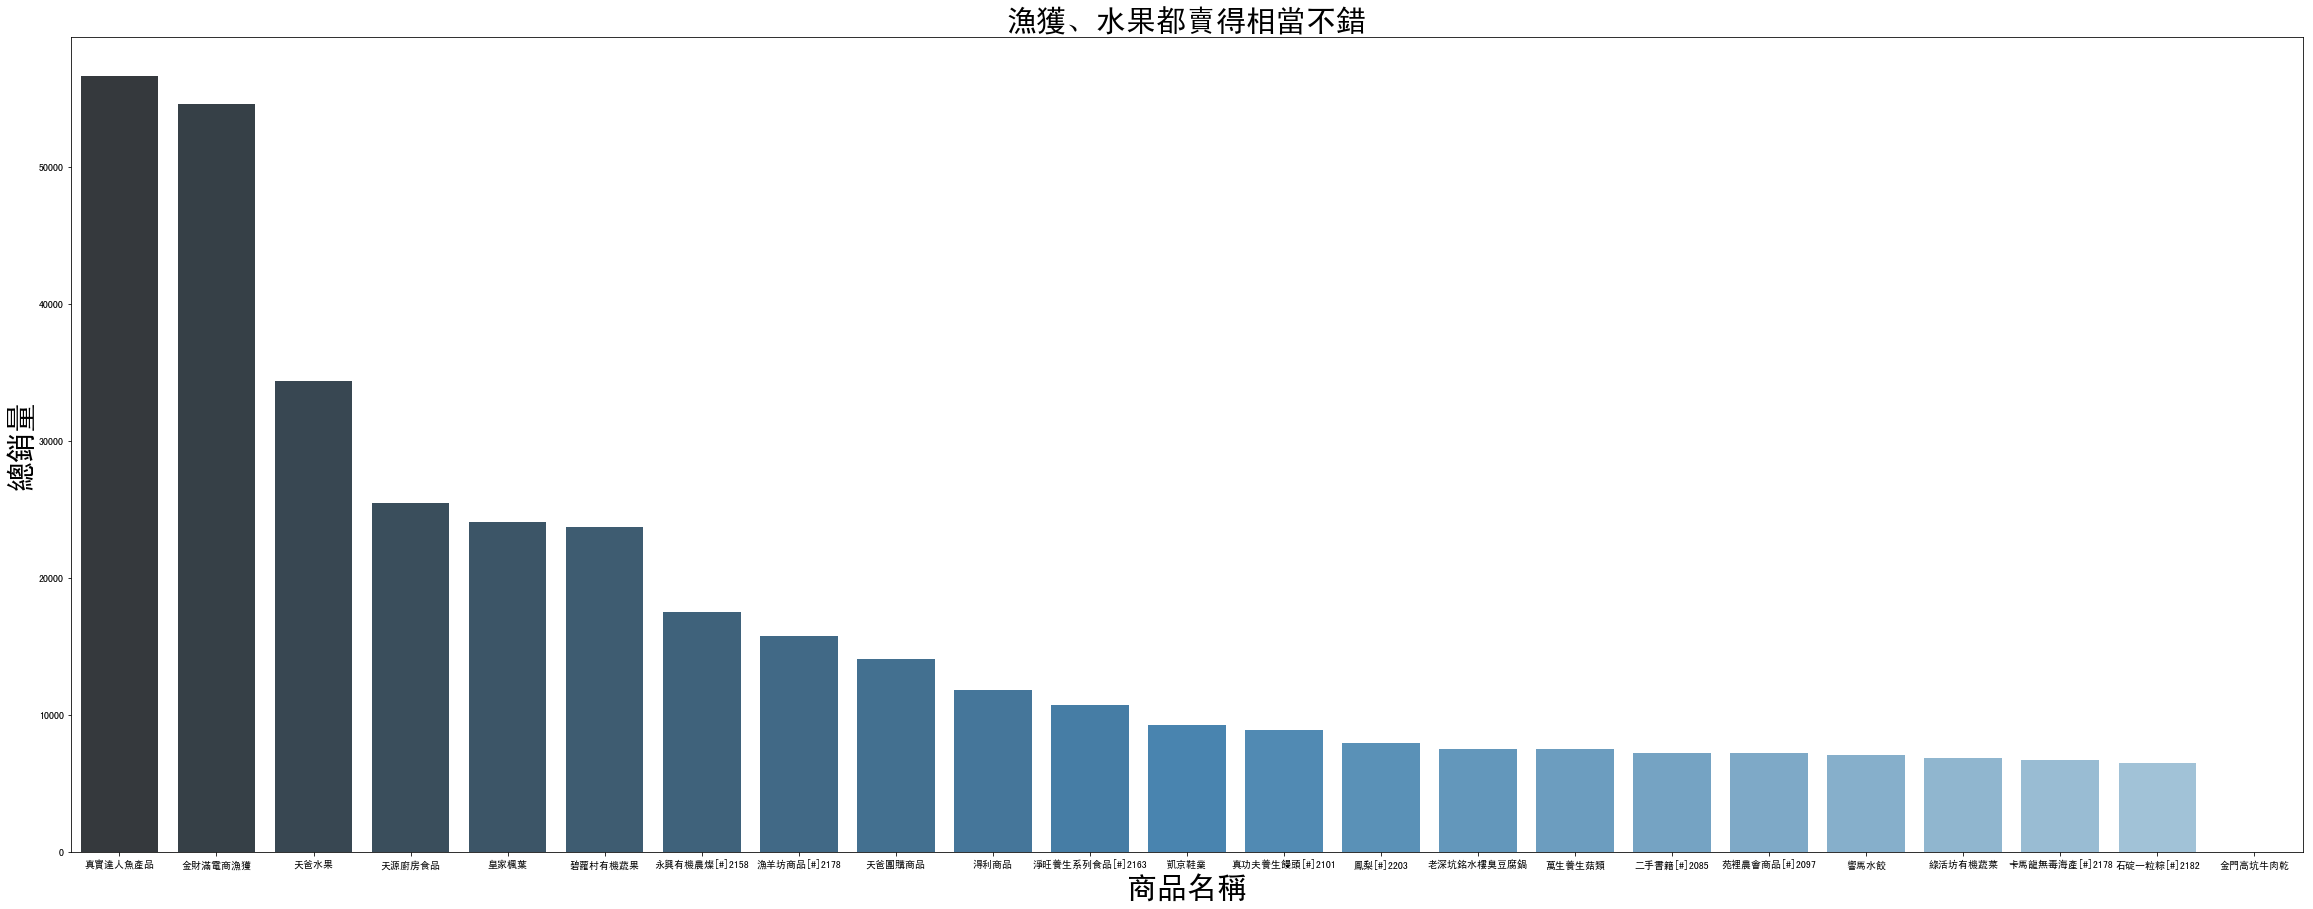

In [363]:
hot_product = pvt[pvt.gross > 6000]
hot_product = hot_product.qty.sort_values(ascending = False).to_frame()
f, ax1 = plt.subplots(1,1,figsize=(40,15))
sns.barplot(x=hot_product.index, y='qty', palette="Blues_d", data=hot_product, ax=ax1)
ax1.set_title('漁獲、水果都賣得相當不錯',fontsize=30)
ax1.set_xlabel('商品名稱',fontsize = 30)
ax1.set_ylabel('總銷量',fontsize = 30)


我們可以藉由推銷暢銷商品來吸引更多人購買，合作社也應該為這些品牌設立專區方便選購，畢竟他們是營收的主要來源

# 再來看看qty = 0的商品

In [364]:
pvt[pvt.qty==0].price.describe()

count     154.000000
mean      227.116883
std       271.590810
min         0.000000
25%        78.000000
50%       138.000000
75%       273.500000
max      1618.000000
Name: price, dtype: float64

In [365]:
# 原來是提貨券
pvt[pvt.price > 7000]

,ProdID,qty,price,gross,group
product,,,,,
提貨券,9.000000e+13,-19.0,7400.0,-7900.0,9000


In [366]:
#減項金額？

pvt[pvt.price==0]

,ProdID,qty,price,gross,group
product,,,,,
減項金額,0.0,0.0,0.0,-39591.0,0


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


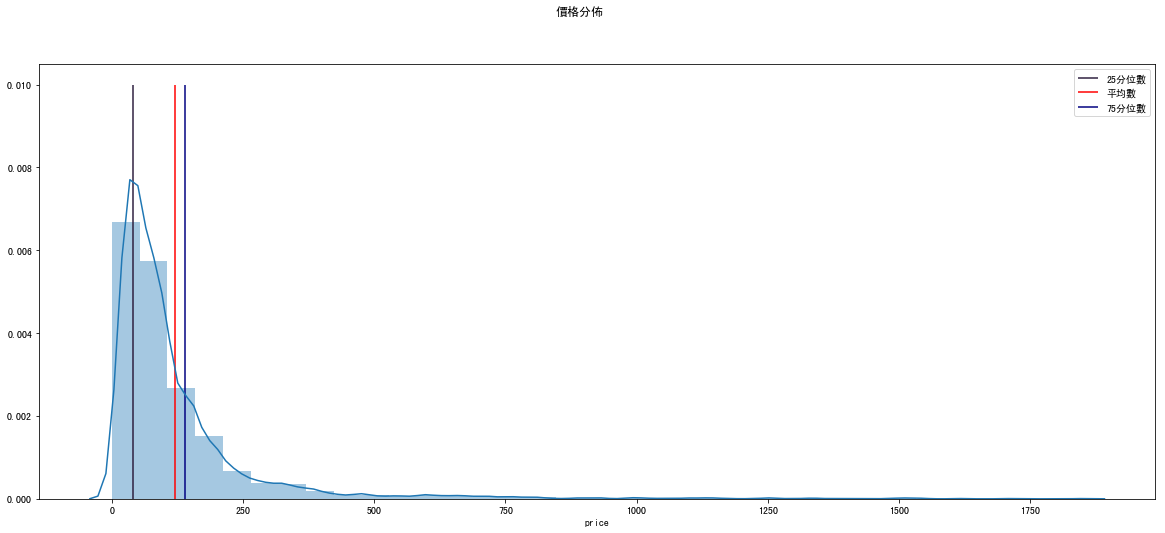

In [367]:
dist = pvt[pvt.price<7000]
plt.figure(figsize = (20,8))
plt.suptitle('價格分佈')
plt.vlines(dist.price.quantile(q= 0.25),ymin=0,ymax=0.01,label = '25分位數',colors =sns.cubehelix_palette(reverse=True))
plt.vlines(dist.price.mean(),ymin=0,ymax=0.01,label = '平均數',colors ='r')
plt.vlines(dist.price.quantile(q=0.75),ymin=0,ymax=0.01,label = '75分位數',colors =sns.light_palette("navy", reverse=True))
plt.legend()
sns.distplot(dist.price,bins=35)

In [368]:
df.head()

,date,customerId,ProdID,product,unit,qty,price,gross,group
0,2018/01/02,125600,4.710105e+12,T30光泉全鮮,個,1.0,27.0,27.0,471
1,2018/01/02,125752,4.710126e+12,義美傳統低糖豆奶1000,個,1.0,37.0,37.0,471
2,2018/01/02,125752,4.713780e+12,利聯四層黑潮吊式口罩7入,個,1.0,39.0,39.0,471
3,NaN,NaN,4.716727e+12,男用手帕,個,1.0,17.0,17.0,471
4,2018/01/02,125752,6.000000e+12,天爸水果,個,70.0,1.0,70.0,600


In [369]:
pvt[pvt.price >1000].head()

,ProdID,qty,price,gross,group
product,,,,,
0.75特級高梁酒〈二鍋頭〉,9.438866e+12,3.0,1224.0,1836.0,942
囍瑞100%特初榨冷壓純級橄欖油,3.364264e+13,3.0,1156.0,897.0,3364
大池有機白米1.5kg,2.827409e+13,14.0,1260.0,2940.0,2826
奧利塔雙橄超值組,1.601430e+13,0.0,1178.0,0.0,1600
屏大薄鹽醬油710,2.827514e+13,19.0,1254.0,3971.0,2826


看到很多都是價格*銷量 != gross

通常這種時候必須回去問業務單位資料更詳細的情況，或許跟單位有關，然而單位只有「個」或者「NaN」

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100257 entries, 0 to 100256
Data columns (total 9 columns):
date          36580 non-null object
customerId    36580 non-null object
ProdID        99670 non-null float64
product       100256 non-null object
unit          99670 non-null object
qty           99670 non-null float64
price         99668 non-null float64
gross         100255 non-null float64
group         100257 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 6.9+ MB


In [371]:
# ProdID缺失值怎麼辦？
df[df.ProdID.isna().values == True]

,date,customerId,ProdID,product,unit,qty,price,gross,group
4975,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-180.0,0
5174,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-431.0,0
5177,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-216.0,0
5194,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-360.0,0
5197,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-240.0,0
5223,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-463.0,0
5231,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-316.0,0
5242,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-20.0,0
5254,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-127.0,0
5260,NaN,NaN,NaN,減項金額,NaN,NaN,NaN,-35.0,0


我們可以看到：這種缺失的商品項目都是減項金額，且是合作社在某一月、或者某一星期（由索引值推得）大量支出。
由於這種並不是銷量的東西並非我們考察銷售的重點，加上難以判定此種資料所代表的意義，故考慮之後決定剔除。

In [372]:
#剔除之後資料縮減為99670筆，接下來做特徵工程
df = df[df.ProdID.isna().values == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99670 entries, 0 to 100256
Data columns (total 9 columns):
date          36580 non-null object
customerId    36580 non-null object
ProdID        99670 non-null float64
product       99669 non-null object
unit          99670 non-null object
qty           99670 non-null float64
price         99668 non-null float64
gross         99668 non-null float64
group         99670 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.6+ MB


# 特徵工程

把剩餘的少許缺失值填補，有商品、價格、總銷售需要填，缺失最多的顧客代號、日期則最後填

In [373]:
# 我們先看看商品缺少的那個
df[df['product'].isna().values ==True]

,date,customerId,ProdID,product,unit,qty,price,gross,group
31282,NaN,NaN,4.711093e+12,NaN,個,1.0,48.0,48.0,471


In [374]:
print(df[df.ProdID ==4.711093e+12])
print('It shows that the product is unique , so we can\'t use other data to reason the matter')
# his_group = df[df.group==471]
# his_group[(his_group.price==48) & (his_group.qty==1)]

Empty DataFrame
Columns: [date, customerId, ProdID, product, unit, qty, price, gross, group]
Index: []
It shows that the product is unique , so we can't use other data to reason the matter


In [375]:
df[df['price'].isna().values ==True]

,date,customerId,ProdID,product,unit,qty,price,gross,group
78858,NaN,NaN,6.000000e+12,提貨券,個,-1.0,NaN,NaN,600
83903,NaN,NaN,6.000000e+12,提貨券,個,-1.0,NaN,NaN,600


看到id都一樣，所以我們看一下它的分佈，再決定要填的統計量

In [376]:
df.loc[78855:78866]

,date,customerId,ProdID,product,unit,qty,price,gross,group
78855,2018/01/16,303201,6.000000e+12,戴記餛飩,個,2.0,100.0,200.0,600
78856,NaN,NaN,6.000000e+12,碧蘿村有機蔬果,個,31.0,1.0,31.0,600
78857,NaN,NaN,6.000000e+12,碧蘿村有機蔬果,個,-31.0,1.0,-31.0,600
78858,NaN,NaN,6.000000e+12,提貨券,個,-1.0,NaN,NaN,600
78859,2018/01/16,288612141,4.710114e+12,舒潔紙手帕 18包,個,1.0,79.0,79.0,471
78860,NaN,NaN,4.710522e+12,佩登斯冬毛褲襪,個,1.0,148.0,148.0,471
78861,NaN,NaN,4.711105e+12,532男襪,個,1.0,67.0,67.0,471
78862,NaN,NaN,4.711105e+12,532男襪,個,1.0,67.0,67.0,471
78863,NaN,NaN,4.711105e+12,532男襪,個,1.0,67.0,67.0,471
78864,NaN,NaN,4.711105e+12,532男襪,個,1.0,67.0,67.0,471


count     679.000000
mean      294.845361
std       166.572062
min       100.000000
25%       200.000000
50%       300.000000
75%       400.000000
max      1500.000000
Name: price, dtype: float64


0    200.0
dtype: float64

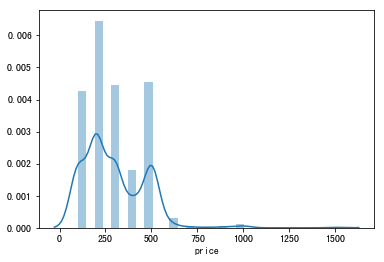

In [377]:
# pvt[pvt.index=='提貨券'].gross.sum()
df[df['product']=='提貨券']['ProdID'].unique()
# df[df.ProdID.values == 6.000000e+12]
# df[df['ProdID']==6.000000e+12]
print(df[df['product']=='提貨券'].price.dropna().describe())
sns.distplot(df[df['product']=='提貨券'].price.dropna())
df[df['product']=='提貨券'].price.dropna().mode()

呈現雙峰分佈，所以我們決定採用提貨券的眾數填補。那因為qty是-1，所以gross我們用負的mode填補

In [378]:
nan_value = df[df['product']=='提貨券'].price.dropna().mode().values[0]
df.price.fillna(nan_value,inplace = True)
df.gross.fillna(-nan_value,inplace = True)

In [379]:
#接著把不知道是啥的那筆資料刪除
df = df.drop(index = df[df['product'].isna()].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99669 entries, 0 to 100256
Data columns (total 9 columns):
date          36580 non-null object
customerId    36580 non-null object
ProdID        99669 non-null float64
product       99669 non-null object
unit          99669 non-null object
qty           99669 non-null float64
price         99669 non-null float64
gross         99669 non-null float64
group         99669 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.6+ MB


觀察可以發現日期、顧客代號是有連續性的，因此我們簡單填上上一位有效顧客的代號、上一筆確認交易的日期即可。
也就是找最近的值來填補。由一開始的100257減少到99669，減少的資料也都屬於同一類別還算可以接受，資料也變得乾淨很多。

In [380]:
df.fillna(method='ffill',inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99669 entries, 0 to 100256
Data columns (total 9 columns):
date          99669 non-null object
customerId    99669 non-null object
ProdID        99669 non-null float64
product       99669 non-null object
unit          99669 non-null object
qty           99669 non-null float64
price         99669 non-null float64
gross         99669 non-null float64
group         99669 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.6+ MB
None


,date,customerId,ProdID,product,unit,qty,price,gross,group
0,2018/01/02,125600,4.710105e+12,T30光泉全鮮,個,1.0,27.0,27.0,471
1,2018/01/02,125752,4.710126e+12,義美傳統低糖豆奶1000,個,1.0,37.0,37.0,471
2,2018/01/02,125752,4.713780e+12,利聯四層黑潮吊式口罩7入,個,1.0,39.0,39.0,471
3,2018/01/02,125752,4.716727e+12,男用手帕,個,1.0,17.0,17.0,471
4,2018/01/02,125752,6.000000e+12,天爸水果,個,70.0,1.0,70.0,600


# 我們畫出營收的時間序列的圖看看，發現非常平穩，無明顯淡旺季，即使暑假寒假亦然，可以推測：

# 1. 有固定族群在消費
# 2.消費者客群，學生比例很少 

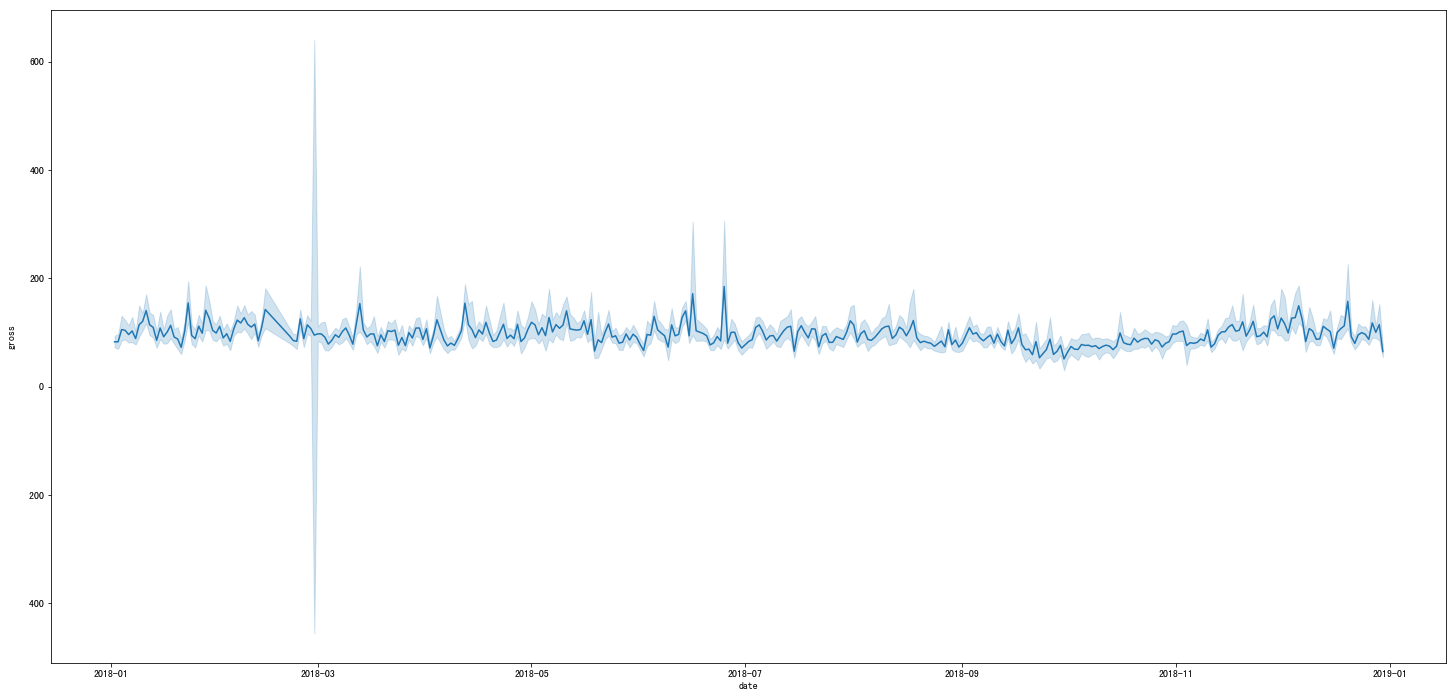

In [395]:
dt = df
time = pd.to_datetime(dt.date)
plt.figure(figsize = (25,12))
sns.lineplot(time,df.gross)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


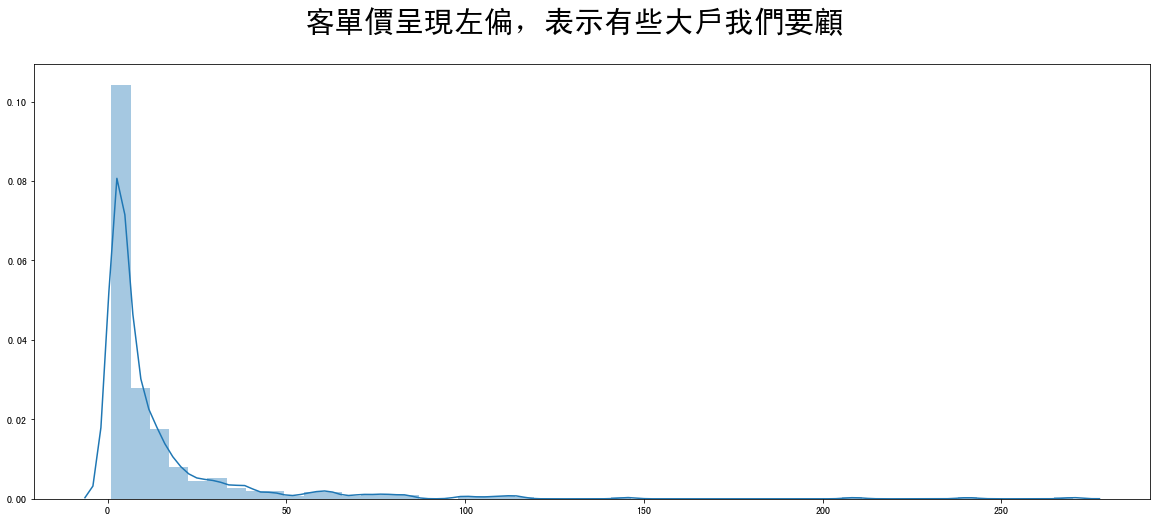

In [414]:
every_customer = df.groupby(df.customerId)
plt.figure(figsize = (20,8))
plt.suptitle('客單價呈現左偏，表示有些大戶我們要顧',fontsize = 30)
sns.distplot(every_customer['gross'].sum()/every_customer['qty'].sum())

In [422]:
df.head()

,date,customerId,ProdID,product,unit,qty,price,gross,group
0,2018/01/02,125600,4.710105e+12,T30光泉全鮮,個,1.0,27.0,27.0,471
1,2018/01/02,125752,4.710126e+12,義美傳統低糖豆奶1000,個,1.0,37.0,37.0,471
2,2018/01/02,125752,4.713780e+12,利聯四層黑潮吊式口罩7入,個,1.0,39.0,39.0,471
3,2018/01/02,125752,4.716727e+12,男用手帕,個,1.0,17.0,17.0,471
4,2018/01/02,125752,6.000000e+12,天爸水果,個,70.0,1.0,70.0,600


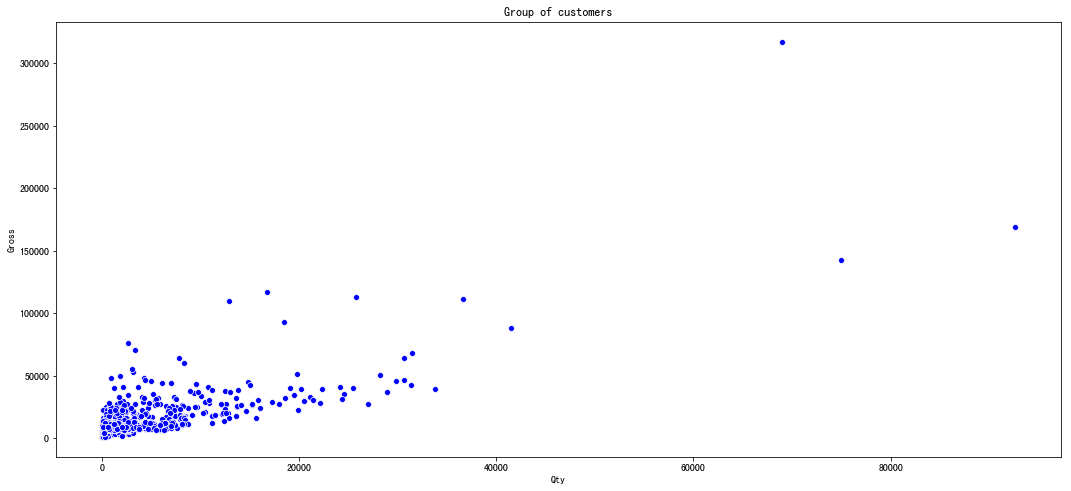

In [455]:
x1 = every_customer['qty'].sum()
x2= every_customer['gross'].sum()
plt.figure(figsize = (18,8))
sns.scatterplot(x=x1,y=x2,color='b')
plt.title('Group of customers')
plt.xlabel('Qty')
plt.ylabel('Gross')
plt.show()

In [484]:
import plotly
from plotly.graph_objs import Scatter,Layout
import plotly.offline as po

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode , iplot
from plotly import figure_factory as ff
init_notebook_mode(connected=True)

# Create random data with numpy
import numpy as np



# Create a trace
trace = go.Scatter(
    x = np.array(x1),
    y = np.array(x2),
    mode = 'markers',
     name = str([x for x in every_customer.customerId.unique()])
)

data = [trace]

fig = go.Figure(data=data)
iplot(fig)

In [540]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
x = np.array(x1)
y = np.array(x2)
train_data = np.array(list(zip(x,y)))
train_data = scale(train_data)
model = KMeans(n_clusters=3 , n_init=10)
model.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

No handles with labels found to put in legend.


輪廓係數: 0.6734493599770566


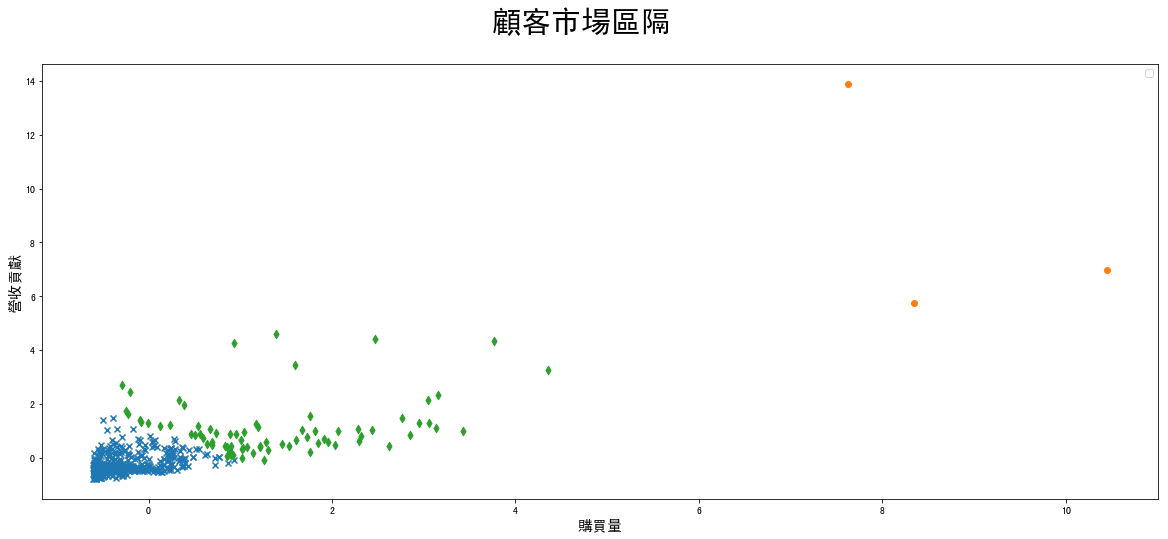

In [549]:
from sklearn.metrics import silhouette_score
print('輪廓係數:' ,silhouette_score(train_data , model.labels_))
plt.figure(figsize = (20,8))
plt.suptitle('顧客市場區隔',fontsize = 30)
plt.xlabel('購買量',fontsize= 15)
plt.ylabel('營收貢獻',fontsize = 15)

for cluster,marker in zip(range(5) , ['x','o','d','2','*']):
    x_axis = train_data[:,0][model.labels_ == cluster]
    y_axis = train_data[:,1][model.labels_== cluster]
    plt.scatter(x_axis,y_axis , marker=marker)
plt.legend()

可以針對:

* 橘色點族群優化服務、認識會員
* 綠色點族群固定寄發折扣碼、交叉銷售提升購買量
* 藍色點思考廣告行銷、與顧客接觸點等促使他們來店消費。

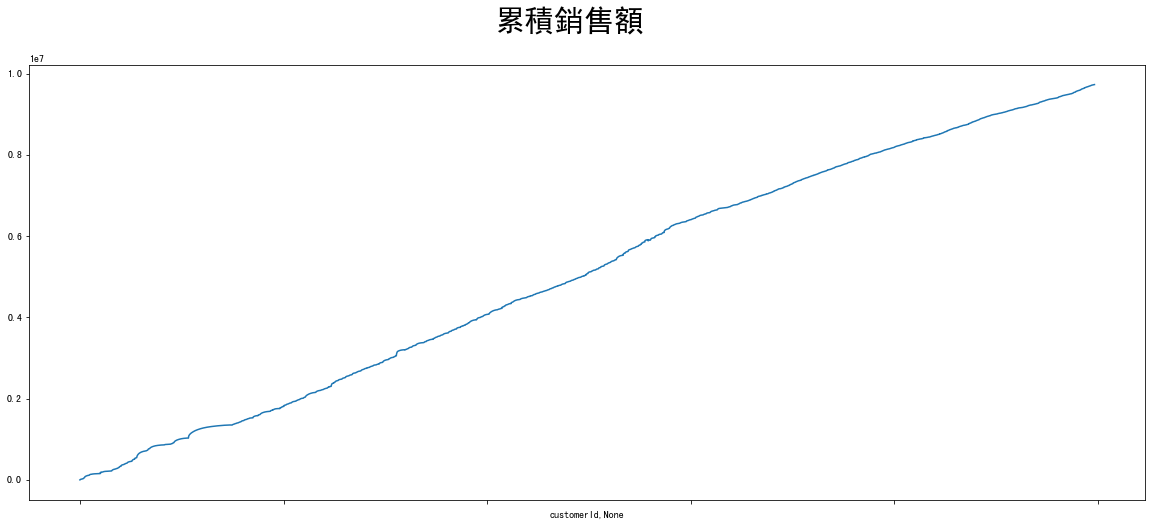

In [568]:
cust_dist = every_customer.apply(lambda x:x.sort_values(by = 'gross',ascending = False))
plt.figure(figsize = (20,8))
plt.suptitle('累積銷售額',fontsize = 30)
cust_dist.gross.cumsum().plot()

由累積銷售曲線未出現平部，顯示合作社還在一個成長階段，此時投入行銷策略以及編制行銷成本或許能帶來不錯的獲利。
由此可知如果要擬定行銷策略，我們必須先著重在第一群，也就是消費量極少的這些人以及「第0群」，也就是消費量跟第一群一樣，接近沒有消費的一群人。
藉由帶入新顧客來引導公司繼續成長。